**Samineni Jayaprakash| Data Science intern | Oasis Infobye | # Task 5**

# SALES PREDICTION USING PYTHON

**IMPPORTING LIBRARIES

In [1]:
#importing libraries
#import pandas library and make it as pd
import pandas as pd
#import matplotlib library and make it as plt
import matplotlib.pyplot as plt
#import numpy library and make it as np
import numpy as np
#import seaborn library and make it as sns
import seaborn as sns
#import scipy library
import scipy
from scipy import stats
from warnings import filterwarnings
filterwarnings("ignore")


**IMPORTING DATASET OF ADVERTISING**

In [2]:
data=pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
#check the size of the dataset
data.shape

(200, 5)

Interpretation: There are 200 rows and 5 columns present in the dataset

In [4]:
#name changing
data.rename(columns={"Unnamed: 0":"Index"},inplace=True)

In [5]:
data

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
#datatypes
data.dtypes

Index          int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
# load first 20 rows
data.head(20)

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [9]:
# load last 20 rows
data.tail(20)

,Index,TV,Radio,Newspaper,Sales
180,181,156.6,2.6,8.3,10.5
181,182,218.5,5.4,27.4,12.2
182,183,56.2,5.7,29.7,8.7
183,184,287.6,43.0,71.8,26.2
184,185,253.8,21.3,30.0,17.6
185,186,205.0,45.1,19.6,22.6
186,187,139.5,2.1,26.6,10.3
187,188,191.1,28.7,18.2,17.3
188,189,286.0,13.9,3.7,15.9
189,190,18.7,12.1,23.4,6.7


In [10]:
# check for null values
data.isna().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
#check duplicate values
data.duplicated().sum()

0

Interpretation: There is no duplicated values presented in the dataset

In [12]:
# describe summary statistics
data.describe()

,Index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


INTERPREATION: It computes summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, minimum,
maximum, and percentiles

In [13]:
# correlation 
data.corr()

,Index,TV,Radio,Newspaper,Sales
Index,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


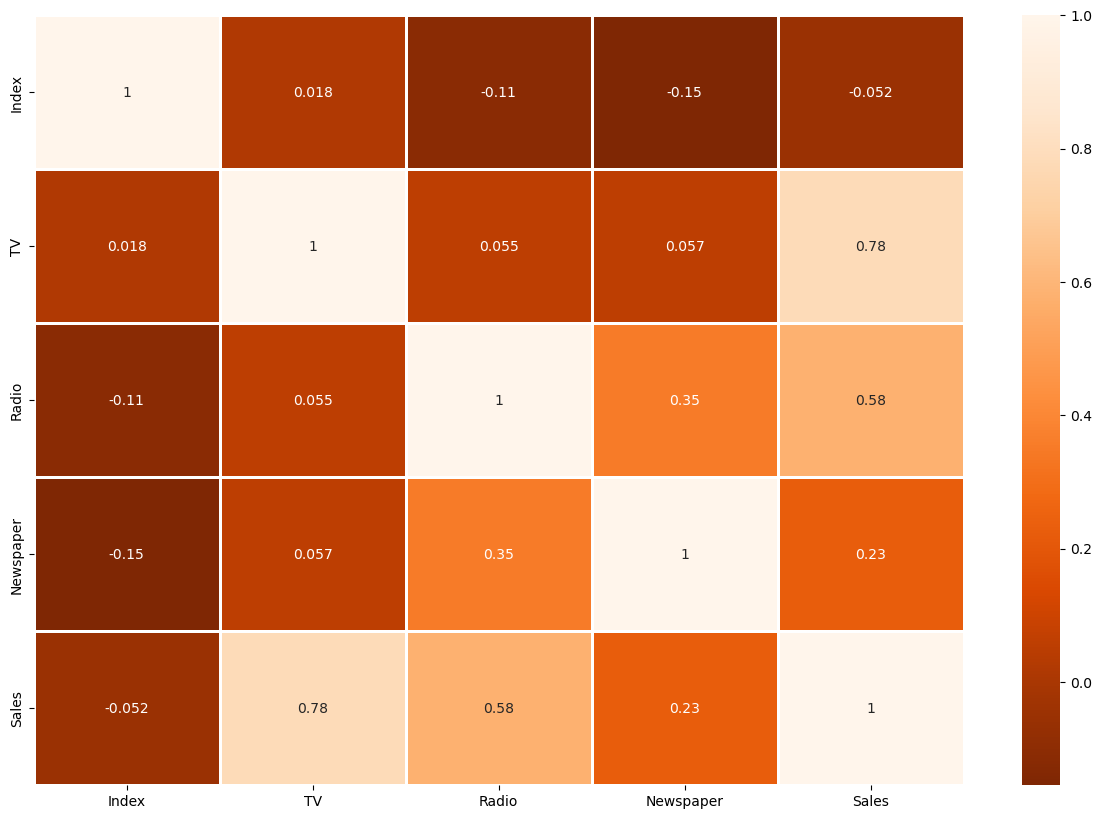

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,linewidths=0.95,cmap="Oranges_r",fmt=".2g")
plt.show()

INTERPREATION : Here TV and Sales are the Strong Positive Correlation

In [15]:
# coveriance
data.cov()

,Index,TV,Radio,Newspaper,Sales
Index,3350.000000,88.027387,-95.110050,-195.311558,-15.587186
TV,88.027387,7370.949893,69.862492,105.919452,350.390195
Radio,-95.110050,69.862492,220.427743,114.496979,44.635688
Newspaper,-195.311558,105.919452,114.496979,474.308326,25.941392
Sales,-15.587186,350.390195,44.635688,25.941392,27.221853


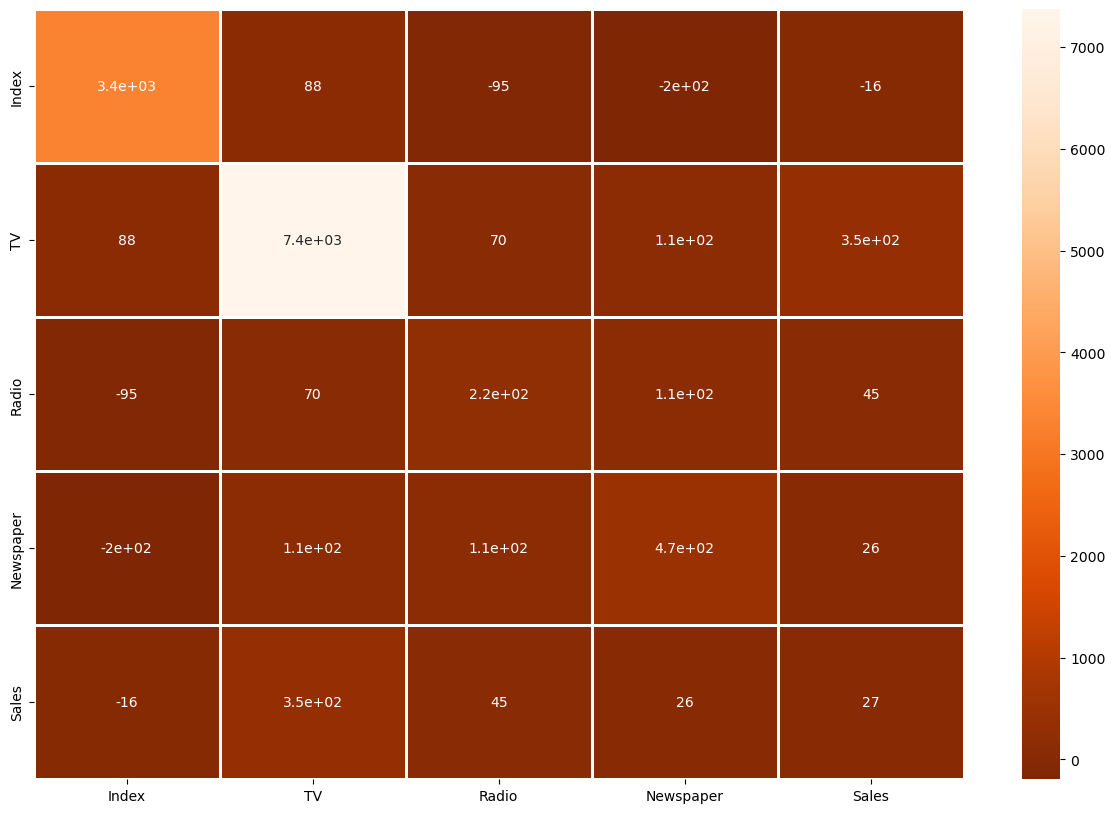

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.cov(),annot=True,linewidths=0.95,cmap="Oranges_r",fmt=".2g")
plt.show()

INTERPREATION: Here TV and TV is the 7370.949893 relatively High value

In [17]:
data["TV"].sum()

29408.5

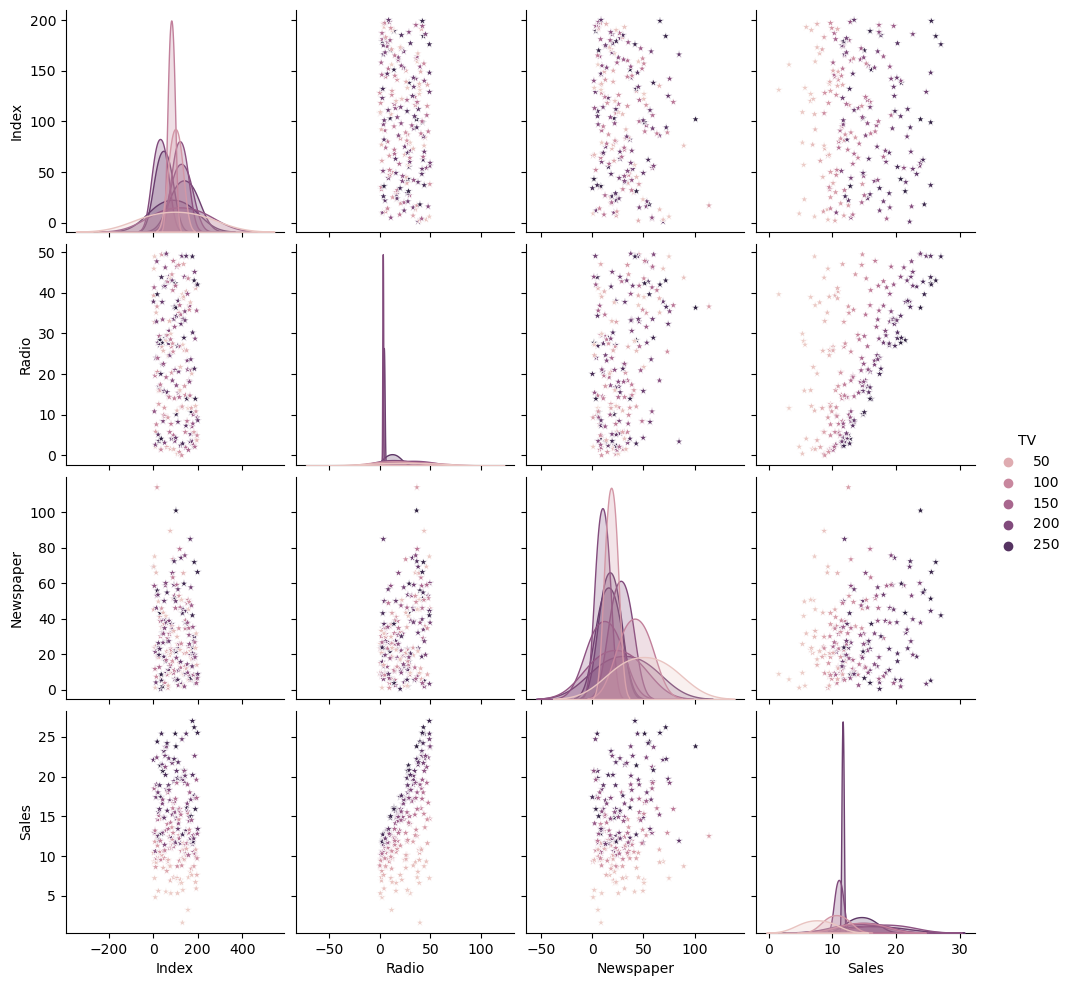

In [18]:
#pairplot
sns.pairplot(data=data,hue="TV",markers="*")
plt.show()

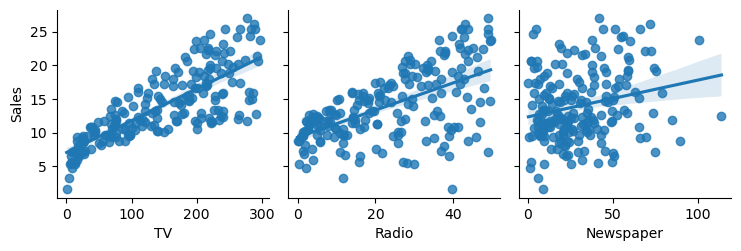

In [19]:

# to check linear relationship between independent varibles(x) and dependent variable(y):
sns.pairplot(data, x_vars=["TV", "Radio","Newspaper"], y_vars="Sales",kind='reg')

In [20]:
# skewness
data.skew()

Index        0.000000
TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [21]:
# kurtosis
data.kurt()

Index       -1.200000
TV          -1.226495
Radio       -1.260401
Newspaper    0.649502
Sales       -0.408869
dtype: float64

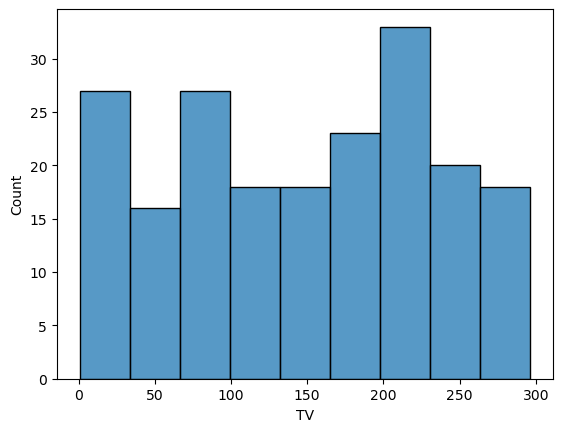

In [22]:
#histogram
sns.histplot(data["TV"])
plt.show()

INTERPREATION: The distribution of TV advertising is slightly left skewed

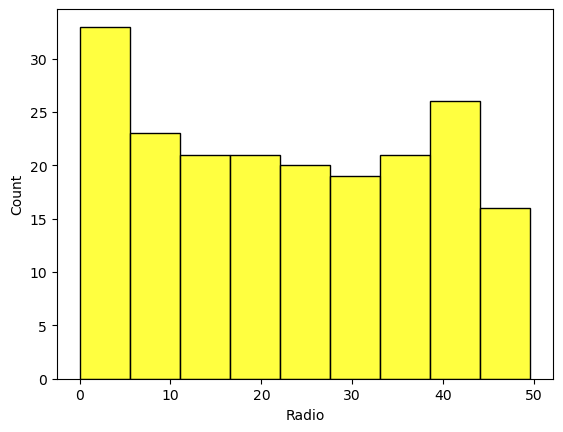

In [23]:
#histogram
sns.histplot(data["Radio"],color="yellow")
plt.show()

INTERPREATION: The distribution of Radio advertising is slightly right skewed

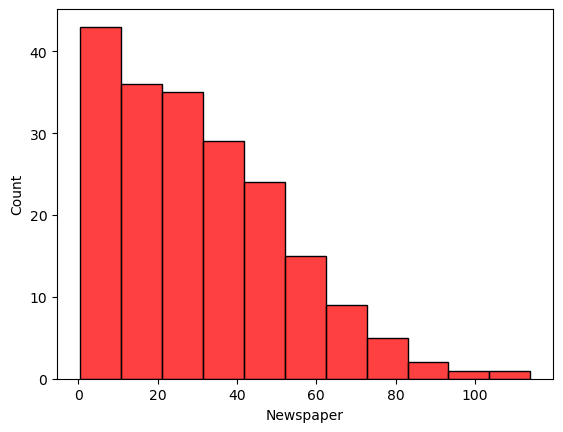

In [24]:
#histogram
sns.histplot(data["Newspaper"],color="red")
plt.show()

INTERPREATION: The distribution of Newspaper advertising is significantly right skewed

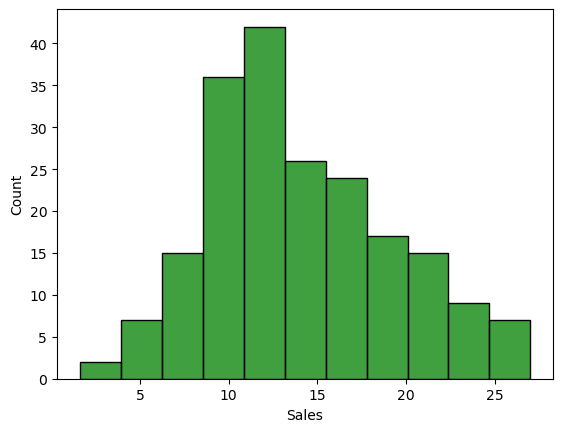

In [25]:
#histogram
sns.histplot(data["Sales"],color="green")
plt.show()

INTERPREATION: The distribution of Sales is slightly right skewed

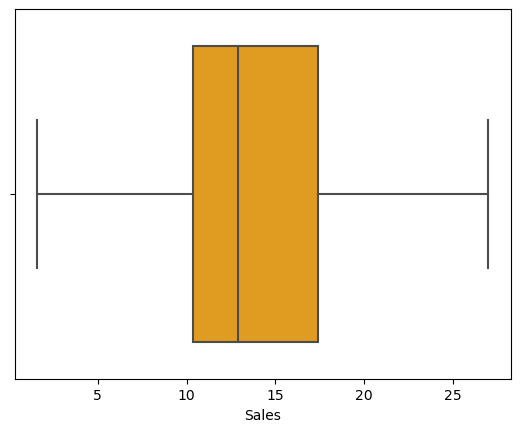

In [26]:
# boxplot:
sns.boxplot(x = 'Sales', data =data,color="orange")
# Display the plot:
plt.show()

INTERPRETATION There is no outliers in this Sales Column

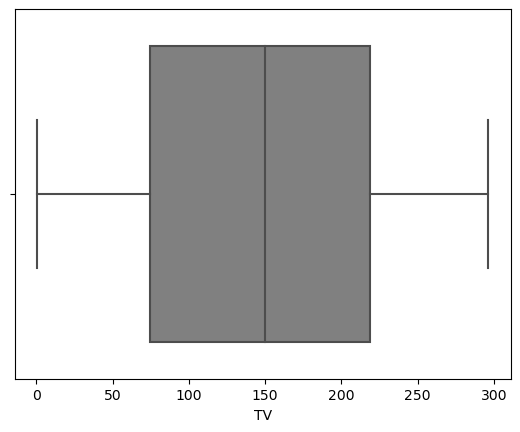

In [27]:
 #boxplot:
sns.boxplot(x = 'TV', data = data,color="gray")
# Display the plot:
plt.show()

INTERPRETATION: There is no outliers in this TV Column

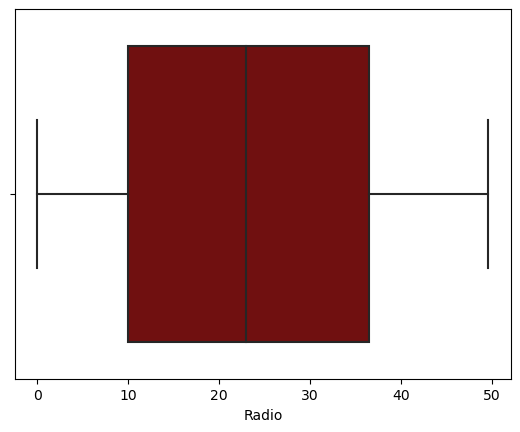

In [28]:
#boxplot:
sns.boxplot(x = 'Radio', data = data,color="maroon")
# Display the plot:
plt.show()


INTERPRETATION : There is no outliers in this Radio Column

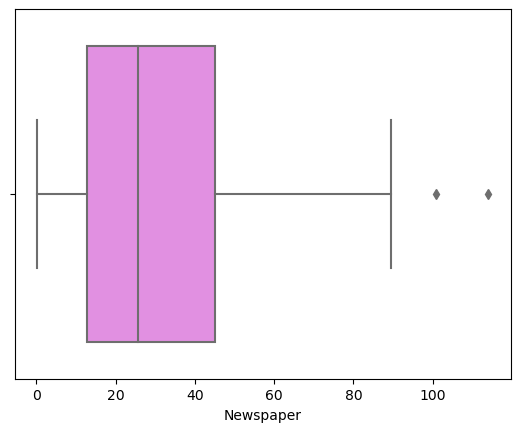

In [29]:

# boxplot:
sns.boxplot(x = 'Newspaper', data = data,color="violet")
# Display the plot:
plt.show()


INTERPREATION: There are outliers present in this Newspaper column so we need to remove those outliers

In [30]:

# Calculate the IQR (Interquartile Range)
Q1 = data['Newspaper'].quantile(0.25)
Q3 = data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Create a new DataFrame without outliers
data1 = data[(data['Newspaper'] >= lower_bound) & (data['Newspaper'] <= upper_bound)]

In [31]:
data1

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [32]:
data1.shape

(198, 5)

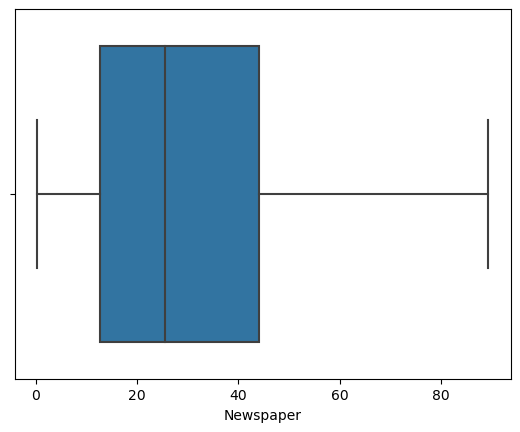

In [33]:

# boxplot:
sns.boxplot(x = 'Newspaper', data = data1)
# Display the plot:
plt.show()

INTERPREATION: Successfully Removed outliers

<Axes: >

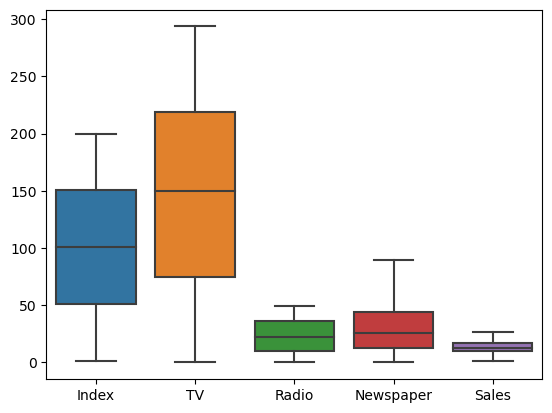

In [34]:

# BoxPlot:
sns.boxplot(data=data1)


# MODEL BUILDING

In [35]:
X= data1.drop(['Index','Sales'], axis=1)
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[198 rows x 3 columns]


In [36]:
y=data1["Sales"]

In [37]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

In [38]:
 #we need to split the data for training and testing:
from sklearn.model_selection import train_test_split
# train- 70
# test - 30
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
# Linear regression:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [39]:

# model training:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(x_test)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {MSE:.2f}")
print(f"Root Mean Squared Error: {RMSE:.2f}")
print(f"R-squared: {R2:.2f}")


Mean Squared Error: 2.85
Root Mean Squared Error: 1.69
R-squared: 0.89


In [41]:
# print metric to get performance:
print('Accuracy: ', model.score(x_test, y_test)*100)

Accuracy:  88.8110159880892


In [42]:
model.coef_

array([0.04720595, 0.18616631, 0.01012152])

In [43]:
model.intercept_

2.384263230936444

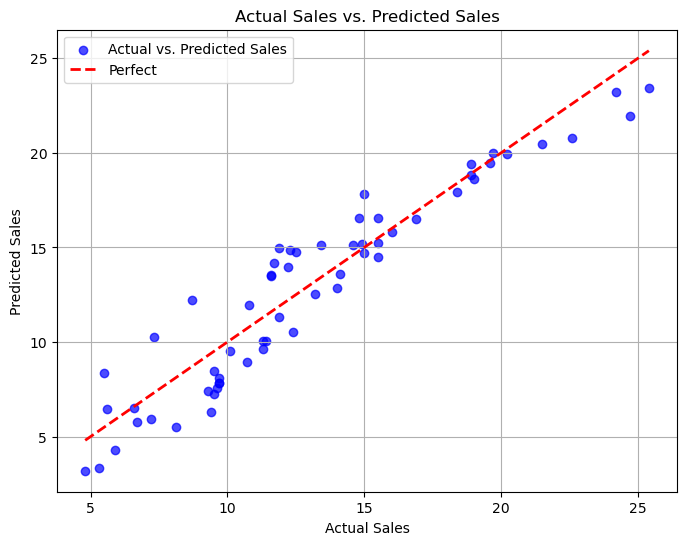

In [44]:
# Visualize the model's predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o', alpha=0.7, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label="Perfect")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [45]:
#create new dataframe:
new_df = pd.DataFrame({
 'TV': [256, 56, 75],
 'Radio': [45, 16, 30],
 'Newspaper': [10, 5, 15]
})
new_df = pd.DataFrame(new_df)
print(new_df)
new_predictions = model.predict(new_df[['TV', 'Radio', 'Newspaper']])
# Display the predictions for the new data
print("Predictions for New Data:")
print(new_predictions)

    TV  Radio  Newspaper
0  256     45         10
1   56     16          5
2   75     30         15
Predictions for New Data:
[22.94768475  8.05706481 11.66152134]
